In [ ]:
from google.colab import drive
drive.mount('/content/drive')
img_path = '/content/drive/My Drive/Colab Notebooks/Ch4_HR_HRV_Generation/'

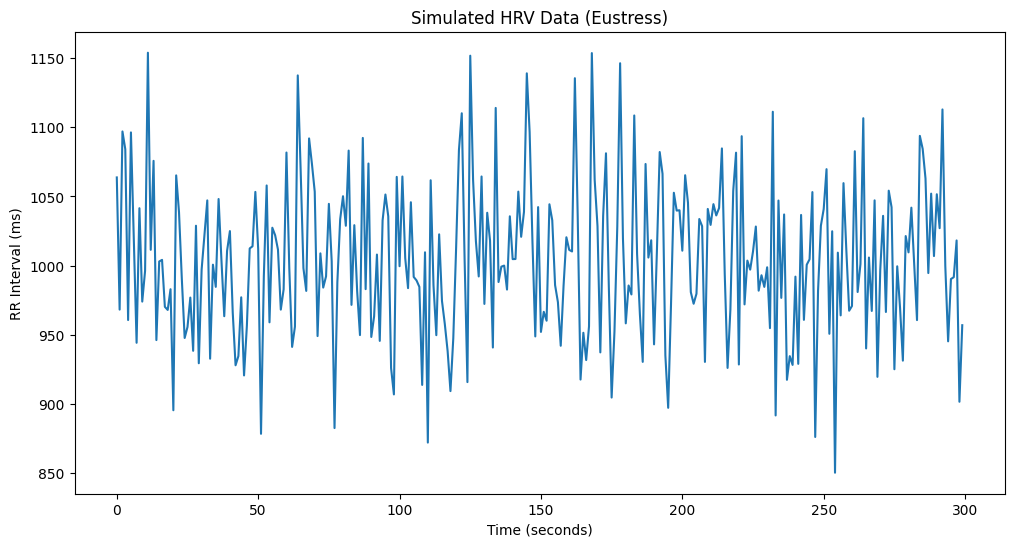

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hrv(stress_type='none', duration=300, base_rate=60):
    """
    Generate simulated HRV data.

    :param stress_type: Type of stress ('eustress', 'distress', or 'none')
    :param duration: Duration of the HRV data in seconds
    :param base_rate: Base heart rate in beats per minute
    :return: HRV data as a list of RR intervals in milliseconds
    """
    # Base HRV simulation: generate normal sinus rhythm with slight random variation
    rr_intervals = np.random.normal(loc=60000 / base_rate, scale=50, size=duration)

    # Modify HRV for eustress or distress
    if stress_type == 'eustress':
        # Eustress typically shows a more variable HRV
        rr_intervals += np.random.normal(loc=0, scale=20, size=duration)
    elif stress_type == 'distress':
        # Distress can lead to a higher heart rate and reduced variability
        rr_intervals -= np.random.normal(loc=0, scale=20, size=duration)
        rr_intervals = np.clip(rr_intervals, 500, 1000)  # Ensure realistic RR intervals

    return rr_intervals

# Example usage
hrv_data = generate_hrv(stress_type='eustress', duration=300, base_rate=60)

# Plotting the HRV data
plt.figure(figsize=(12, 6))
plt.plot(hrv_data)
plt.title("Simulated HRV Data (Eustress)")
plt.xlabel("Time (seconds)")
plt.ylabel("RR Interval (ms)")
plt.show()


In [5]:
def classify_stress(hrv_data):
    """
    Classify the stress type from HRV data using basic metrics.

    :param hrv_data: List of RR intervals in milliseconds
    :return: Predicted stress type ('eustress', 'distress', 'none')
    """
    # Calculate HRV metrics
    sdnn = np.std(hrv_data)  # Standard Deviation of NN intervals
    mean_rr = np.mean(hrv_data)  # Mean of RR intervals

    # Basic thresholding for classification
    if sdnn > 60 and mean_rr > 600:
        return 'eustress'
    elif sdnn < 40 and mean_rr < 600:
        return 'distress'
    else:
        return 'none'

# Example usage
predicted_stress = classify_stress(hrv_data)
predicted_stress



'none'

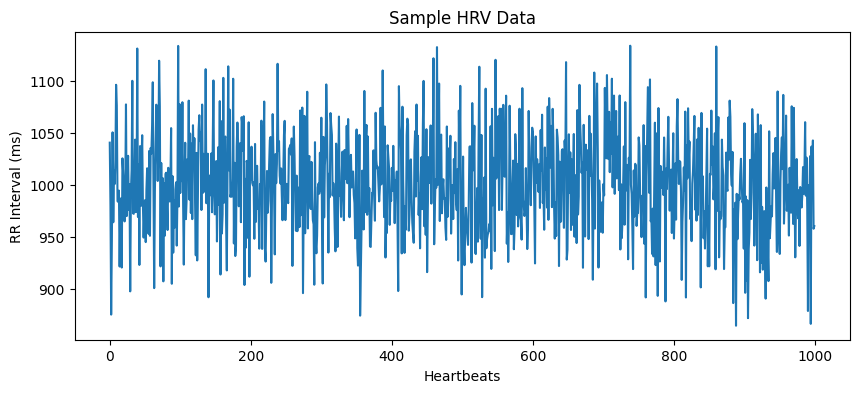

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hrv_data(duration_minutes, target_sdnn, target_mean_rr):
    """
    Generate HRV data for a specified duration with a target SDNN and mean RR interval.

    :param duration_minutes: Total duration in minutes for the HRV data.
    :param target_sdnn: Target standard deviation of NN intervals.
    :param target_mean_rr: Target mean of RR intervals.
    :return: Generated HRV data as a list of RR intervals in milliseconds.
    """
    # Calculate the number of heartbeats (assuming an average heart rate of 60 bpm)
    num_beats = duration_minutes * 60

    # Generate RR intervals with the desired mean and standard deviation
    rr_intervals = np.random.normal(loc=target_mean_rr, scale=target_sdnn, size=num_beats)

    return rr_intervals

# Example usage
duration = 1000  # Duration in minutes
target_sdnn = 50  # Target SDNN in milliseconds
target_mean_rr = 1000  # Target mean RR interval in milliseconds

hrv_data = generate_hrv_data(duration, target_sdnn, target_mean_rr)

# Plotting the generated HRV data
plt.figure(figsize=(10, 4))
plt.plot(hrv_data[:1000])  # Plotting the first 1000 data points for visualization
plt.title("Sample HRV Data")
plt.xlabel("Heartbeats")
plt.ylabel("RR Interval (ms)")
plt.show()


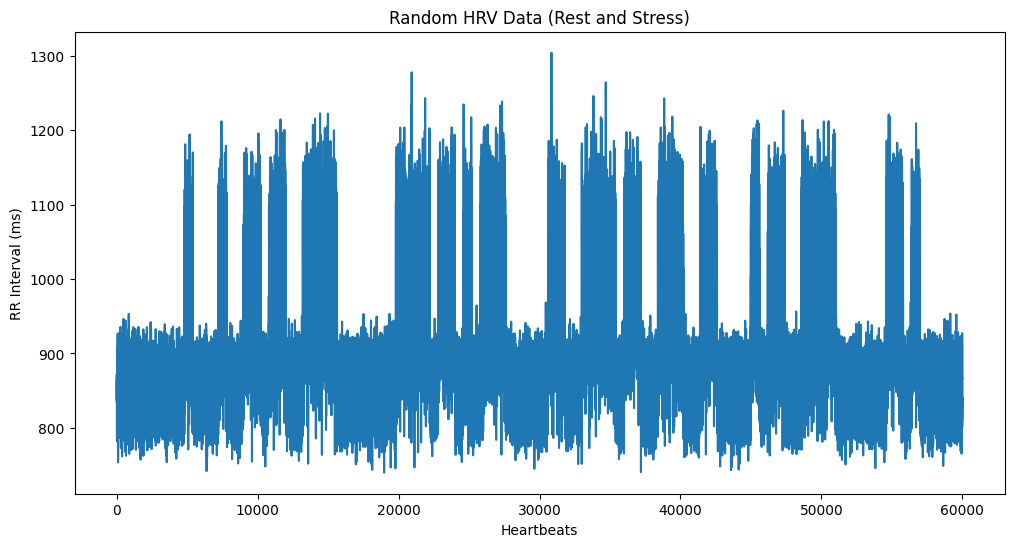

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hrv_segment(duration_minutes, scenario):
    """
    Generate a segment of HRV data based on a given scenario.

    :param duration_minutes: Duration of the segment in minutes.
    :param scenario: Scenario type ('rest' or 'stress').
    :return: Segment of HRV data as a list of RR intervals in milliseconds.
    """
    # Define SDNN and mean RR values for different scenarios
    if scenario == 'rest':
        target_sdnn = 70  # Higher variability
        target_mean_rr = 1000  # Normal resting heart rate
    elif scenario == 'stress':
        target_sdnn = 30  # Lower variability
        target_mean_rr = 850  # Elevated heart rate

    # Calculate the number of heartbeats
    num_beats = duration_minutes * 60

    # Generate RR intervals
    rr_intervals = np.random.normal(loc=target_mean_rr, scale=target_sdnn, size=num_beats)

    return rr_intervals

def generate_random_hrv(duration_total=1000, segment_length=10):
    """
    Generate HRV data for the total duration with random rest and stress segments.

    :param duration_total: Total duration in minutes.
    :param segment_length: Length of each segment in minutes.
    :return: Full HRV data for the total duration.
    """
    scenarios = ['rest', 'stress']
    hrv_data = []

    for _ in range(0, duration_total, segment_length):
        scenario = np.random.choice(scenarios)
        hrv_segment = generate_hrv_segment(segment_length, scenario)
        hrv_data.extend(hrv_segment)

    return hrv_data

# Generate random HRV data
hrv_data = generate_random_hrv()

# Plotting a sample of the generated HRV data
plt.figure(figsize=(12, 6))
# plt.plot(hrv_data[:2000])  # Plotting a smaller sample for better visibility
plt.plot(hrv_data)
plt.title("Random HRV Data (Rest and Stress)")
plt.xlabel("Heartbeats")
plt.ylabel("RR Interval (ms)")
plt.show()
